In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

---

# **What is a Vector Space?**

A set (V) is a **vector space** if it is closed under all **linear combinations**:

$$
cv + dw \in V \quad \text{for all scalars } c, d \text{ and vectors } v, w \in V.
$$

Closure under addition and scalar multiplication is the key idea.

---

In [2]:
# Let’s take the set of all multiples of the vector ((1,2)).
# This *is* a vector space because any linear combination stays on the same line.

# The "space": all multiples of v
v = np.array([1, 2])

# take two vectors in the space
a = 3 * v
b = -2 * v

# linear combination
c, d = 4, -1
lc = c*a + d*b

print("Linear combination:", lc)
print("Is it still multiple of v?", np.allclose(lc / v, lc[0]/v[0]))

Linear combination: [14 28]
Is it still multiple of v? True


---

# **Subspaces in $ \mathbb{R}^3 $**

A **plane through the origin** in $ \mathbb{R}^3 $ is a subspace.
A **line through the origin** is also a subspace.

Because both contain all scalar multiples and all linear combinations of their vectors.

---

## **Union of a Plane (P) and Line (L)**

If you take
$$
P \cup L = \text{all vectors in P or in L}
$$

This is **NOT a subspace** (in general).

**Reason:** If you pick

* one vector from the plane
* one vector from the line
  their sum will usually leave the union.

---

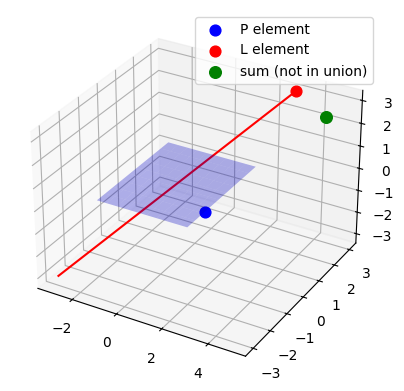

In [4]:
## 🎨 **Python Visualization (3D)**

# We will draw a plane through the origin and a line through the origin and show points whose sum leaves the union.



# plane: span of (1,0,0) and (0,1,0)
# line: span of (1,1,1)
u = np.array([1,0,0])
v = np.array([0,1,0])
w = np.array([1,1,1])

# sample point from plane
p = 2*u + (-1)*v          # (2, -1, 0)

# sample point from line
l = 3*w                   # (3,3,3)

# their sum
s = p + l                 # (5, 2, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plane grid
xx, yy = np.meshgrid(np.linspace(-2,2,10), np.linspace(-2,2,10))
zz = np.zeros_like(xx)
ax.plot_surface(xx, yy, zz, alpha=0.3, color='blue')

# line
t = np.linspace(-3,3,20)
ax.plot(t, t, t, color='red')

# points
ax.scatter(*p, color='blue', s=60, label='P element')
ax.scatter(*l, color='red', s=60, label='L element')
ax.scatter(*s, color='green', s=70, label='sum (not in union)')

ax.legend()
plt.show()

---

# **Intersection of Subspaces**

The **intersection** of two subspaces (S) and (T):

$$
S \cap T = { v : v \in S \text{ and } v \in T }
$$

**IS ALWAYS a subspace**.

### Why?

If $v, w \in S \cap T$, then:

* Because $v, w \in S$, all linear combinations are in **S**.
* Because $v, w \in T$, all linear combinations are in **T**.

So linear combinations are in **both** → so in the intersection.

For a plane (P) and a line (L) in $ \mathbb{R}^3 $ ,
$$
P \cap L = {0}
$$
if the line is not inside the plane.

---

---

# **Column Space of a Matrix**

Consider a **4×3** matrix:

$$
A =
\begin{bmatrix}
1 & 2 & 3 \\
0 & 1 & 4 \\
1 & 1 & 1 \\
2 & 0 & 1
\end{bmatrix}
$$

Its **column space** (C(A)) is the set of all linear combinations of its columns.

Since the columns live in $\mathbb{R}^4$,
$$
C(A) \subseteq \mathbb{R}^4.
$$

---


## ❓ Does (Ax=b) have a solution for all (b)?

No.
This is an underdetermined system: **3 unknowns, 4 equations**.
A vector (b) must lie in the column space (C(A)) to have a solution.

Example of a (b) that has **no** solution:
Let $b = (0,0,1,0)^T$. Usually not in the span of the columns.

In [5]:
A = sp.Matrix([
    [1,2,3],
    [0,1,4],
    [1,1,1],
    [2,0,1]
])
b = sp.Matrix([0,0,1,0])  # probably not in the column space

print("Rank(A):", A.rank())
print("Rank([A|b]):", A.row_join(b).rank())

if A.rank() == A.row_join(b).rank():
    print("Solution exists.")
else:
    print("No solution: b not in column space.")

Rank(A): 3
Rank([A|b]): 4
No solution: b not in column space.


---

# **Linear Independence and Pivot Columns**

Columns of (A) are **independent** if none of them can be written as a linear combination of the others.

* If all 3 columns are independent → dimension is 3.
* If only 2 are independent → dimension is 2.

If only 2 columns are pivot columns, then
$$
C(A) \cong \mathbb{R}^2 \subseteq \mathbb{R}^4.
$$

---

---

# **Null Space of a Matrix (A)**

The **null space**:

$$
N(A) = { x \in \mathbb{R}^n : Ax = 0 }
$$

If the matrix has 3 unknowns, the null space is a subspace of $ \mathbb{R}^3 $.

Example: Suppose the null space consists of all multiples of
$$
(1,1,-1)
$$

Then the null space is a **line** in $ \mathbb{R}^3 $.

It always contains at least the zero vector.

---

In [6]:
A = sp.Matrix([
    [1, 2, 3],
    [0, 1, 4],
    [1, 1, 1],
    [2, 0, 1]
])

N = A.nullspace()
print("Null space basis:", N)

Null space basis: []


- An empty list means: The null space is only the zero vector (equivalently: the null space has dimension 0).
- In other words: The columns of A are linearly independent.

In [8]:
B = sp.Matrix([
    [1, 2, 3],
    [2, 4, 6],
    [3, 6, 9]
])

print(B.nullspace())


[Matrix([
[-2],
[ 1],
[ 0]]), Matrix([
[-3],
[ 0],
[ 1]])]
